

# Indian start-up ecosystem


Your team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, you are to investigate the ecosystem and propose the best course of action.
Analyze funding received by start-ups in India from 2018 to 2021.
Separate data for each year of funding will be provided.
• In these datasets, you'll find the start-ups' details, the funding amounts received, and the investors' information


# Hypothesis

Location of the sector has effect on the amount of start up funding
Locattion of the sector dose not have any effect on the start up funding

<b> Business understanding and Analytical questions<b>

1. which Head quarter has the most start up located
2. top 10 headquarter that has the highest start up funding
3. top 10 sector recieve the most start up funding
4. which year has the most highest funding
5. What is the funding trend in the Indian start-up ecosystem over the past few years

#  Step 1

Importing the all the needed liberaries and the data ffor the project 

In [121]:
# Neccesary liberaries
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
from scipy import stats
import statistics as stat
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

 
warnings.filterwarnings('ignore')

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
 
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [3]:
# code to connect the sever, database, username and passward
conn_str =f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# conection to the server
connection = pyodbc.connect(conn_str)


In [5]:
# import the 2020 and 2021 SQL file from the server
query1 = "Select * from LP1_startup_funding2020"
data_2020 = pd.read_sql(query1, connection)
 
query2 = "Select * from LP1_startup_funding2021"
data_2021 = pd.read_sql(query2, connection)

In [6]:
data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [7]:
# 2019 CSV data
data_2019 = pd.read_csv('startup_funding2019.csv')

In [8]:
# 2018 CSV data
data_2018 = pd.read_csv('startup_funding2018.csv')

In [9]:
# to add year column to all the imported data
data_2018['Year']='2018'
data_2019['Year']='2019'
data_2020['Year']='2020'
data_2021['Year']='2021'

#  Step 2

cleaning and concating the two CSV files 2018 and 2019

In [10]:
# Drop the Colunms that we may not need for the project

data_2019.drop(['Founded', 'Founders', 'Investor'], axis=1, inplace=True)

In [11]:
# Select specific columns and rename them

data_2018 = data_2018.rename(columns={'Company Name': 'Company_Brand', 'Round/Series': 'Stage', 'Industry': 'Sector', 'Amount': 'Amount', 'About Company': 'BIO', 'Location':'HeadQuarter'})
data_2019 = data_2019.rename(columns={'Company/Brand': 'Company_Brand', 'Sector': 'Sector', 'Stage': 'Stage', 'Amount($)': 'Amount', 'What it does': 'BIO', 'HeadQuarter':'HeadQuarter'})

Hamornizing the stage column in 2018 & 2019

In [12]:
# df2018 Dataframe 

data_2018.replace(to_replace=['Seed round', 'Seed funding', 'Early seed', 'Seed fund', 'Seed Investment', 'Seed Round', 'Seed+'], value='Seed', inplace=True)
data_2018.replace(to_replace=['Angel Round'], value='Angel', inplace=True)
data_2018.replace(to_replace=['Venture - Series Unknown'], value='Undisclosed', inplace=True)
data_2018.replace(to_replace=['Debt Financing', 'Post-IPO Debt'], value='Debt', inplace=True)
data_2018.replace(to_replace=['Private Equity', 'Post-IPO Equity'], value='Equity', inplace=True)
data_2018.replace(to_replace=['Corporate Round', 'Grant', 'Secondary Market', 'Non-equity Assistance', 'Funding Round'], value='Other', inplace=True)
data_2018.replace(to_replace=['Pre-Series B', 'Pre-series B'], value='Pre-Seed', inplace=True)

# df2019 Dataframe

data_2018.replace(to_replace=['Seed funding', 'Seed fund', 'Seed round'], value='Seed', inplace=True)
data_2018.replace(to_replace=['Pre series A', 'Pre-series A'], value='Pre-Seed', inplace=True)
data_2018.replace(to_replace=['Series B+'], value='Series B', inplace=True)
data_2018.replace(to_replace=['Post series A', 'Fresh funding'], value='Other', inplace=True)


# Remove non-standard entries

data_2018 = data_2018[data_2018['Stage'].str.startswith('https') == False]

In [23]:
data_2018.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,BIO,Year,Tech,Non_tech
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,None,"Brand Marketing, Event Promotion, Marketing, S..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,None,"Agriculture, Farming"
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,None,"Credit, Financial Services, Lending, Marketplace"
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,"Financial Services, FinTech",None
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,None,"E-Commerce Platforms, Retail, SaaS"


In [20]:
# Cleaning the sector column


# data cleaning of Sector in 2018

# data_2018['Tech'] = data_2018['Sector'].apply(lambda x: x if 'Tech' in str(x) or 'tech' in str(x) or 'AI' in str(x) or 'IoT' in str(x) else None)
# data_2018['Non_tech'] = data_2018['Sector'].apply(lambda x: x if 'Tech' not in str(x) and 'tech' not in str(x)
#                                                        and 'AI' not in str(x) and 'IoT' not in str(x) else None)
# # create a new column in 2019, 2020 and 2021 with tech and another that has sector that do not have tech
# data_2019['Tech'] = data_2019['Sector'].apply(lambda x: x if 'Tech' in str(x) or 'tech' in str(x) or 'AI' in str(x) or 'IoT' in str(x) else None)
# data_2019['without_tech'] = data_2019['Sector'].apply(lambda x: x if 'Tech' not in str(x) and 'tech' not in str(x) and 'AI' not in str(x) and 'IoT' not in str(x) else None)
# #2020
# data_2020['Tech'] = data_2020['Sector'].apply(lambda x: x if 'Tech' in str(x) or 'tech' in str(x) or 'AI' in str(x) or 'IoT' in str(x) else None)
# data_2020['without_tech'] = data_2020['Sector'].apply(lambda x: x if 'Tech' not in str(x) and 'tech' not in str(x) and 'AI' not in str(x) and 'IoT' not in str(x) else None)
# #2021
# data_2021['Tech'] = data_2021['Sector'].apply (lambda x:x if 'Tech' in str(x) or 'tech' in str(x) or'AI' in str(x) or 'IoT' in str(x) else None)
# data_2021['without_tech']=data_2021['Sector'].apply ( lambda x:x if 'Tech'not in str(x) and 'tech' not in str(x) and 'AI' not in str(x) and 'IoT' not in str(x) else None)


<b>Harmonising the HeadQuater/Location column entries in 2018&2019 data.<b>

In [29]:
# code to sparete the headquarters in 2018
data_2018_new=data_2018['HeadQuarter'].str.split(pat=',', n=1, expand=True)
data_2018['Head']=data_2018_new[0]

In [30]:
# drop headquarter column
data_2018.drop(['HeadQuarter'], axis=1, inplace=True)
# rename the head column
data_2018.rename(columns={'Head':'HeadQuarter'}, inplace=True)

In [31]:
# data cleaning of headquarter in 2018
data_2018.replace(to_replace=['Bangalore City','Bangalore'], value='Bangalore', inplace=True)
data_2018.replace(to_replace=['Delhi','New Delhi'], value='Delhi', inplace=True)
data_2018.replace(to_replace=['Cochin'], value='Kochi', inplace=True)
data_2018.replace(to_replace=['Kormangala'], value='Koramangala', inplace=True)
data_2018.replace(to_replace=['Powai','Worli'], value='Mumbai', inplace=True)
data_2018.replace(to_replace=['Uttar Pradesh', 'Andhra Pradesh'], value='Andhra Pradesh', inplace=True)
data_2018.replace(to_replace=['Trivandrum', 'India'], value='Trivandrum', inplace=True)


# data cleaning of headquarter in 2019
data_2019.replace(to_replace=['Delhi,New Delhi'], value='Delhi', inplace=True)

<b>CHECK FOR DUPLICATE ENTRIES IN THE NEW DATASET df2018 & df2019<b>

In [32]:
data_2018.duplicated().value_counts()

False    524
True       1
dtype: int64

In [33]:
data_2018.drop_duplicates(keep='first', inplace=True)

In [34]:
data_2019.duplicated().value_counts()

False    89
dtype: int64

# Step 3 

Merging 2018 & 2019 and Checking for currency

In [35]:
# Merge the two csv files 

data_18_19 = pd.concat([data_2018, data_2018], ignore_index=True)

In [36]:
# Create a new column 'currency' based on currency symbols

data_18_19['currency'] = data_18_19['Amount'].apply(lambda x: 'INR' if '₹' in x else ('USD' if '$' in x else 'USD'))

In [37]:
# Create columns 'amount_inr' and 'amount_usd'

data_18_19['amount_inr'] = data_18_19.apply(lambda row: row['Amount'] if row['currency'] == 'INR' else 0, axis=1)
data_18_19['amount_usd'] = data_18_19.apply(lambda row: row['Amount'] if row['currency'] == 'USD' else 0, axis=1)

In [38]:
# Remove the currency sysmbols and the commas 

data_18_19['amount_inr'] = data_18_19['amount_inr'].str.replace('₹', '').str.replace('$', '').str.replace(',', '')
data_18_19['amount_usd'] = data_18_19['amount_usd'].str.replace('₹', '').str.replace('$', '').str.replace(',', '')

In [39]:
# Replace 'Undisclosed' values with NaN

data_18_19['amount_inr'] = data_18_19['amount_inr'].replace('Undisclosed', np.nan, regex=True)
data_18_19['amount_usd'] = data_18_19['amount_usd'].replace('Undisclosed', np.nan, regex=True)

In [40]:
# Convert the object values into numeric values for calculation

data_2018['amount_inr'] = pd.to_numeric(data_18_19['amount_inr'], errors='coerce')
data_2019['amount_usd'] = pd.to_numeric(data_18_19['amount_usd'], errors='coerce')

In [41]:
# Create a new column 'Updated_Amount' by filling missing values in 'amount_inr' with 'amount_usd'
data_18_19['Updated_Amount'] = data_18_19['amount_inr'].fillna(data_18_19['amount_usd'])

In [ ]:
# #2018 Exchange rate Rupee to a Dollar.
# exchange_rate = 68.14

# def rupee_to_dollar(amount):
#     if isinstance(amount, str) and amount.startswith('₹'):
#         amount = float(amount.replace(',', '')[1:]) * exchange_rate
#         return f'${amount:.2f}'
#     else:
#         return amount

# # remove rupee sign and comma, and convert to dollar equivalent
# df_startup['Amount($)'] = df_startup['Amount($)'].apply(lambda x: rupee_to_dollar(x))

In [44]:
data_18_19.duplicated().value_counts()

False    524
dtype: int64

In [43]:
data_18_19.drop_duplicates(keep='first', inplace=True)

In [51]:
data_18_19.head(2)

,Company_Brand,Sector,Stage,BIO,Year,HeadQuarter,Amount
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore,250000
1,Happy Cow Dairy,"Agriculture, Farming",Seed,A startup which aggregates milk from dairy far...,2018,Mumbai,40000000


In [46]:
data_18_19.drop(['Tech','Non_tech'], axis=1, inplace=True)
data_18_19.drop(['currency','amount_inr','amount_usd'], axis=1, inplace=True)
data_18_19.drop(['Amount'], axis=1, inplace=True)
data_18_19.rename(columns={'Updated_Amount':'Amount'}, inplace=True)

# Step 4

Cleaning and concating the two SQL file 2021 & 2018

In [52]:
# Renaming the Column

data_2020 = data_2020.rename(columns={'Company_Brand': 'Company_Brand', 'Sector': 'Sector', 'Amount': 'Amount', 'What_it_does': 'BIO', 'Location':'HeadQuarter'})
data_2021 = data_2021.rename(columns={'Company_Brand': 'Company_Brand', 'Sector': 'Sector', 'Amount': 'Amount', 'What_it_does': 'BIO', 'HeadQuarter':'HeadQuarter'})

<b> Drop some columns that might not be needed for the analysis <b>

In [53]:
data_2020.drop(['Founded', 'Founders', 'Investor'], axis=1, inplace=True)
data_2021.drop(['Founded', 'Founders', 'Investor'], axis=1, inplace=True)
data_2020.drop(columns=['column10'], inplace=True)

<b>Harmonising the Stage column entries in 2020&2021 data.<b>

In [54]:
# data2020 DataFrame 

data_2020.replace(to_replace=['Seed Round', 'Seed round', 'Seed funding', 'Seed A', 'Seed Funding', 'Seed Investment','Pre seed Round', 'Seed funding' 'Seed A' 'Pre-seed', 'Pre seed round', 'Pre-seed Round', 'Pre-Seed'], value='Seed', inplace=True)
data_2020.replace(to_replace=['Series A1', 'Series A-1'], value='Series A', inplace=True)
data_2020.replace(to_replace=['Series B2'], value='Series B', inplace=True)
data_2020.replace(to_replace=['Pre series B', 'Pre-Series B', 'Pre series C', 'Pre-Series B' 'Pre series C','Pre series A1', 'Pre-series', 'Pre series A', 'Pre-series A', 'Pre- series A', 'Pre Series A', 'Pre-series A1', 'Pre-series C', 'Pre-series B'], value='Pre-Series', inplace=True)
data_2020.replace(to_replace=['Series E', 'Series E2', 'Series F'], value='Series E and Beyond', inplace=True)
data_2020.replace(to_replace=['Series C, D', 'Series D', 'Series D1'], value='Series D', inplace=True)
data_2020.replace(to_replace=['Bridge Round', 'Edge', 'Bridge'], value='Bridge', inplace=True)
data_2020.replace(to_replace=['Angel Round'], value='Angel', inplace=True)




# data2021 DataFrame

data_2021.replace(to_replace=['Seed Round', 'Seed round', 'Seed funding', 'Seed A', 'Seed+', 'Seed Funding', 'Seed Investment','Pre seed Round', 'Early seed', 'Seed funding' 'Seed A' 'Pre-seed', 'Pre seed round', 'Pre-seed', 'Pre-seed Round', 'Pre-Seed'], value='Seed', inplace=True)
data_2021.replace(to_replace=['Series A1', 'Seies A', 'Series A2', 'Series A+', 'Series A-1'], value='Series A', inplace=True)
data_2021.replace(to_replace=['Series B2', 'Series B3'], value='Series B', inplace=True)
data_2021.replace(to_replace=['Pre series B', 'Pre-Series B', 'Pre series C', 'Pre-Series B' 'Pre series C','Pre series A1', 'Pre-series', 'Pre series A', 'Pre-series A', 'Pre- series A', 'Pre Series A', 'Pre-series A1', 'Pre-series C', 'Pre-series B'], value='Pre-Series', inplace=True)
data_2021.replace(to_replace=['Series E', 'Series I', 'Series F1', 'Series H', 'Series G', 'Series F2', 'Series E2', 'Series F'], value='Series E and Beyond', inplace=True)
data_2021.replace(to_replace=['Series C, D', 'Series D', 'Series D1'], value='Series D', inplace=True)
data_2021.replace(to_replace=['Bridge Round', 'Edge', 'Bridge'], value='Bridge', inplace=True)
data_2021.replace(to_replace=['Angel Round', '$300000', '$1200000', '$6000000', '$1000000'], value='Angel', inplace=True)

<b>Harmonising the Sector column entries in 2020&2021 data.<b>

In [39]:
# # data cleaning of Sector in 2020

# data_2020['Tech'] = data_2020['Sector'].apply(lambda x: x if 'Tech' in str(x) or 'tech' in str(x) or 'AI' in str(x) or 'IoT' in str(x) else None)
# data_2020['Non_tech'] = data_2020['Sector'].apply(lambda x: x if 'Tech' not in str(x) and 'tech' not in str(x)
#                                                        and 'AI' not in str(x) and 'IoT' not in str(x) else None)

In [40]:
# # data cleaning of Sector in 2021

# data_2021['Tech'] = data_2021['Sector'].apply(lambda x: x if 'Tech' in str(x) or 'tech' in str(x) or 'AI' in str(x) or 'IoT' in str(x) else None)
# data_2021['Non_tech'] = data_2021['Sector'].apply(lambda x: x if 'Tech' not in str(x) and 'tech' not in str(x)
#                                                        and 'AI' not in str(x) and 'IoT' not in str(x) else None)

<b>Harmonising the HeadQuarter column entries in 2020&2021 data.<b>

In [78]:
#
#  cleaning of HeadQuater 2020
data_2020.replace(to_replace=['Bangalore City','Bangalore'], value='Bangalore', inplace=True)
data_2020.replace(to_replace=['Delhi','New Delhi'], value='Delhi', inplace=True)
data_2020.replace(to_replace=['Ahmadabad'], value='Ahmedabad', inplace=True)
data_2020.replace(to_replace=['Kochi'], value='Cochin', inplace=True)
data_2020.replace(to_replace=['Kormangala'], value='Koramangala', inplace=True)
data_2020.replace(to_replace=['Rajastan'], value='Rajasthan', inplace=True)
data_2020.replace(to_replace=['Powai','Worli'], value='Mumbai', inplace=True)
data_2020.replace(to_replace=['Small Towns', 'Andhra Pradesh','Uttar Pradesh'], value='Andhra Pradesh', inplace=True)
data_2020.replace(to_replace=['Hyderebad'], value='Hyderabad', inplace=True)
data_2020.replace(to_replace=['Gurugram\t#REF!'], value='Gurugram', inplace=True)
data_2020.replace(to_replace=['Orissia'], value='Orissa', inplace=True)
data_2020.replace(to_replace=['Samstipur','Samastipur, Bihar','Samsitpur'], value='Samastipur', inplace=True)
data_2020.replace(to_replace=['The Nilgiris'], value='Nilgiris', inplace=True)
data_2020.replace(to_replace=['Dhindsara', 'Haryana','Dhingsara, Haryana'], value='Dhingsara', inplace=True)
data_2020.replace(to_replace=['Tirunelveli', 'Tamilnadu'], value='Tirunelveli', inplace=True)
data_2020.replace(to_replace=['Mylapore'], value='Chennai', inplace=True)
data_2020.replace(to_replace=['Rajastan'], value='Rajasthan', inplace=True)
data_2020.replace(to_replace=['Trivandrum', 'Kerala, India'], value='Trivandrum', inplace=True)

In [79]:
#  Renaming some of the headquarters the are not in India to outside india in data 2020
data_2020.replace(to_replace=['Frisco', 'France','Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom','Frisco, Texas, United States','Irvine, California, United States','San Francisco Bay Area, West Coast, Western US','Texas, United States','California','New York, United States','San Francisco, California, United States','San Francisco, United States','San Ramon, California','Paris, Ile-de-France, France','Plano, Texas, United States','Sydney','San Francisco Bay Area, Silicon Valley, West Coast','Bangaldesh','London, England, United Kingdom','Sydney, New South Wales, Australia','Milano, Lombardia, Italy','Palmwoods, Queensland, Australia', 'France''Irvine, California, United States','Newcastle Upon Tyne, Newcastle upon Tyne United Kingdom','Shanghai, China','Jiaxing, Zhejiang, China','San Franciscao','San Francisco','New York'], value = 'Outside India', inplace=True)

In [80]:
# filling of missing headquarters in 2020
data_2020['HeadQuarter'].fillna('Undisclosed', inplace=True)

In [81]:
data_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', 'unknown',
       'Singapore', 'Gurugram', 'Gujarat', 'Dhingsara', 'Kerala',
       'Jodhpur', 'Jaipur, Rajastan', 'Outside India', 'Patna',
       'Trivandrum', 'Cochin', 'Samastipur', 'Tumkur, Karnataka',
       'Rajasthan', 'Ludhiana', 'Dehradun',
       'Tangerang, Jawa Barat, Indonesia', 'Berlin', 'Seattle', 'Riyadh',
       'Seoul', 'Bangkok', 'Kanpur', 'Chandigarh', 'Warangal', 'Odisha',
       'Bihar', 'Goa', 'Tamil Nadu', 'Andhra Pradesh', 'Bhopal',
       'Banglore', 'Coimbatore', 'Bengaluru'], dtype=object)

In [82]:
#  cleaning of HeadQuater 2021
data_2021.replace(to_replace=['Bangalore City','Bangalore'], value='Bangalore', inplace=True)
data_2021.replace(to_replace=['Delhi','New Delhi'], value='Delhi', inplace=True)
data_2021.replace(to_replace=['Ahmadabad'], value='Ahmedabad', inplace=True)
data_2021.replace(to_replace=['Kochi'], value='Cochin', inplace=True)
data_2021.replace(to_replace=['Kormangala'], value='Koramangala', inplace=True)
data_2021.replace(to_replace=['Rajastan'], value='Rajasthan', inplace=True)
data_2021.replace(to_replace=['Powai','Worli'], value='Mumbai', inplace=True)
data_2021.replace(to_replace=['Small Towns', 'Andhra Pradesh'], value='Andhra Pradesh', inplace=True)
data_2021.replace(to_replace=['Hyderebad'], value='Hyderabad', inplace=True)
data_2021.replace(to_replace=['Gurugram\t#REF!'], value='Gurugram', inplace=True)
data_2021.replace(to_replace=['The Nilgiris'], value='Nilgiris', inplace=True)
data_2021.replace(to_replace=['Dhindsara', 'Haryana','Dhingsara, Haryana'], value='Dhingsara', inplace=True)
data_2021.replace(to_replace=['Tirunelveli, Tamilnadu'], value='Tirunelveli', inplace=True)
data_2021.replace(to_replace=['Mylapore'], value='Chennai', inplace=True)
data_2021.replace(to_replace=['Rajastan'], value='Rajasthan', inplace=True)
data_2021.replace(to_replace=['Trivandrum', 'Kerala', 'India'], value='Trivandrum', inplace=True)
data_2021.replace(to_replace=['unknown'], value='Undisclosed', inplace=True)

In [83]:
#  Renaming some of the headquarters the are not in India to outside india in data 2020
data_2021.replace(to_replace=['London', 'New York', ' Mountain View', 'CA ', 'Beijing', '' ], value='Outside_India', inplace=True)
data_2021.replace(to_replace=['Online Media\t#REF!', 'Pharmaceuticals\t#REF!', 'Food & Beverages', 
                             'Computer Games', 'Small Towns', ' None', 'None', 'Information Technology & Services'], value='Undisclosed', inplace=True)
data_2021.replace(to_replace=['Gurugram\t#REF!' ], value='Gurugrama', inplace=True)

In [84]:
data_2021['HeadQuarter'].fillna('Undisclosed', inplace=True)

In [85]:
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'Delhi', 'Hyderabad', 'Jaipur',
       'Ahmedabad', 'Chennai', 'Undisclosed', 'Andhra Pradesh', 'Goa',
       'Rajsamand', 'Ranchi', 'Faridabad, Haryana', 'Gujarat', 'Pune',
       'Thane', 'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Kolkata', 'Mohali', 'Dhingsara', 'Indore', 'Ghaziabad', 'Nagpur',
       'West Bengal', 'Patna', 'Samsitpur', 'Lucknow', 'Telangana',
       'Silvassa', 'Thiruvananthapuram', 'Faridabad', 'Roorkee',
       'Ambernath', 'Panchkula', 'Surat', 'Coimbatore', 'Andheri',
       'Mangalore', 'Telugana', 'Bhubaneswar', 'Kottayam',
       'Outside_India', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'Santra', 'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Nilgiris', 'Gandhinagar'], dtype=object)

<b>CHECK FOR DUPLICATE ENTRIES IN THE NEW DATASET df2020 & df2021<b>

In [88]:
data_2020.duplicated().value_counts()

False    1050
dtype: int64

In [87]:
data_2020.drop_duplicates(keep='first', inplace=True)

In [90]:
data_2021.drop_duplicates(keep='first', inplace = True)

In [91]:
data_2021.duplicated().value_counts()

False    1189
dtype: int64

# Step 5

<b> Currency Conversion<b>

In [92]:
# Merge the two sql files 

df20_21 = pd.concat([data_2020, data_2021], ignore_index=True)

In [93]:
# Create a new column 'Updated_Amount' by filling missing values in 'amount_inr' with 'amount_usd'

df20_21['Updated_Amount'] = df20_21['Amount']

In [95]:
# Create a column 'with_$' for values with '$' sign and 'without_$' for values without '$'

df20_21['with_$'] = df20_21['Updated_Amount'].apply(lambda x: x if '$' in str(x) else None)
df20_21['without_$'] = df20_21['Updated_Amount'].apply(lambda x: x if '$' not in str(x) else None)

# Remove the currency sysmbols and the commas 

df20_21['with_$'] = df20_21['with_$'].str.replace('$', '')
# Replace 'Undisclosed' values with NaN

df20_21['with_$'] = df20_21['with_$'].replace('Undisclosed', np.nan, regex=True)
# Convert the object values into numeric values for calculation

df20_21['with_$'] = pd.to_numeric(df20_21['with_$'], errors='coerce')
df20_21['without_$'] = pd.to_numeric(df20_21['without_$'], errors='coerce')

In [96]:
# Merge the two Colunms into a new colunm 

df20_21['Updated_Amount'] = df20_21['without_$'].fillna(df20_21['with_$'])

In [97]:
df20_21.drop(['Amount'], axis=1, inplace=True)
df20_21.rename(columns={'Updated_Amount':'Amount'}, inplace=True)

In [104]:
df20_21.head(2)

,Company_Brand,HeadQuarter,Sector,BIO,Stage,Year,Amount
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,None,2020,200000.0
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,Pre-seed,2020,100000.0


In [103]:
df20_21.drop(['Tech', 'without_tech','with_$','without_$'], axis=1, inplace=True)

# Merging All the Files Together

In [105]:
india_startup_df = pd.concat([data_18_19, df20_21], ignore_index=True)

In [106]:
india_startup_df

,Company_Brand,Sector,Stage,BIO,Year,HeadQuarter,Amount
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore,250000
1,Happy Cow Dairy,"Agriculture, Farming",Seed,A startup which aggregates milk from dairy far...,2018,Mumbai,40000000
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,Leading Online Loans Marketplace in India,2018,Gurgaon,65000000
3,PayMe India,"Financial Services, FinTech",Angel,PayMe India is an innovative FinTech organizat...,2018,Noida,2000000
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Eunimart is a one stop solution for merchants ...,2018,Hyderabad,—
...,...,...,...,...,...,...,...
2758,Gigforce,Staffing & Recruiting,Pre-Series,A gig/on-demand staffing company.,2021,Gurugram,3000000.0
2759,Vahdam,Undisclosed,Series D,VAHDAM is among the world’s first vertically i...,2021,Delhi,20000000.0
2760,Leap Finance,Financial Services,Series C,International education loans for high potenti...,2021,Bangalore,55000000.0
2761,CollegeDekho,EdTech,Series B,"Collegedekho.com is Student’s Partner, Friend ...",2021,Gurugram,26000000.0


In [111]:
india_startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2763 non-null   object 
 1   Sector         2750 non-null   object 
 2   Stage          1882 non-null   object 
 3   BIO            2763 non-null   object 
 4   Year           2763 non-null   object 
 5   HeadQuarter    2763 non-null   object 
 6   Amount         2763 non-null   float64
dtypes: float64(1), object(6)
memory usage: 151.2+ KB


In [108]:

india_startup_df['Amount']= pd.to_numeric(india_startup_df['Amount'], errors='coerce')

In [110]:
india_startup_df['Amount'].fillna(0, inplace=True)

In [ ]:
india_startup_df.replace(to_replace=['Fintech'], value='FinTech', inplace=True)
india_startup_df.replace(to_replace=['EdTech Startup','Edtech','EdtTech'], value='EdTech', inplace=True)
india_startup_df.replace(to_replace=['Insurance', 'Credit, Financial Services, Lending, Marketplace','Banking','Credit','Credit, Financial Services, Lending, Marketplace','Consumer Lending','Accounting','Finance company','Finance','Capital Markets','Venture Capital & Private Equity','Venture capital',], value='Financial Services', inplace=True)
india_startup_df.replace(to_replace=['E-Commerce','Ecommerce','Social e-commerce','E-marketplace'], value='E-commerce', inplace=True)
india_startup_df.replace(to_replace=['Automotive & Rentals','Automobiles'], value='Automotive', inplace=True)
india_startup_df.replace(to_replace=['Agritech','B2B Agritech'], value='AgriTech', inplace=True)
india_startup_df.replace(to_replace=['Food and Beverage','Beverages','Beverage'], value='Food & Beverages', inplace=True)
india_startup_df.replace(to_replace=['Logistics & Supply Chain'], value='Logistics', inplace=True)
india_startup_df.replace(to_replace=['Information Technology & Services','Tech','Internet','IT'], value='Information Technology', inplace=True)
india_startup_df.replace(to_replace=['Gaming startup','Computer Games'], value='Gaming', inplace=True)
india_startup_df.replace(to_replace=['HealthCare','Health Care','Health,Wellness & Fitness','Fitness','Hospital & Health Care','Health','Fitness startup','Health Care','Yoga & wellness','Health & Wellness','Helath care','Healthcare','Health Diagnostics','Heathcare'], value='Healthcare', inplace=True)
india_startup_df.replace(to_replace=['HealthTech'], value='Healthtech', inplace=True)
india_startup_df.replace(to_replace=['SaaS startup','SaaS platform'], value='SaaS', inplace=True)
india_startup_df.replace(to_replace=['FMCG'], value='Consumer Goods', inplace=True)

In [112]:

india_startup_df.replace(to_replace=['Online Media'], value='Media', inplace=True)
india_startup_df.replace(to_replace=['Retail startup','Consumer'], value='Retail', inplace=True)
india_startup_df.replace(to_replace=['Apps','Tech Company','Technology','Information Services','Tech startup'], value='Tech Startup', inplace=True)
india_startup_df.replace(to_replace=['AI','Artificial Intelligence','AI Company','AI startup'], value='AI Startup', inplace=True)
india_startup_df.replace(to_replace=['Computer softwre','Software','Computer','Software Startup','Software Startup'], value='Computer Software', inplace=True)
india_startup_df.replace(to_replace=['Apparel & Fashion','Fashion startup'], value='Fashion', inplace=True)
india_startup_df.replace(to_replace=['B2B Service','B2B marketplace','B2B Ecommerce','B2B E-commerce','B2B startup','B2B service'], value='B2B', inplace=True)
india_startup_df.replace(to_replace=['Food','Foodtech','Food tech'], value='FoodTech', inplace=True)
india_startup_df.replace(to_replace=['Internet of Things'], value='IoT', inplace=True)
india_startup_df.replace(to_replace=['Farming','Agriculture, Farming'], value='Agriculture', inplace=True)
india_startup_df.replace(to_replace=['Deeptech'], value='DeepTech', inplace=True)
india_startup_df.replace(to_replace=['Insuretech','Insurance technology'], value='InsureTech', inplace=True)
india_startup_df.replace(to_replace=['Food Delivery','Delivery Service'], value='Delivery', inplace=True)
india_startup_df.replace(to_replace=['Marketing & Advertising','Brand Marketing','Market Research','Marketing startup'], value='Marketing', inplace=True)
india_startup_df.replace(to_replace=['Biotechnology'], value='BioTechnology', inplace=True)
india_startup_df.replace(to_replace=['Cleantech'], value='CleanTech', inplace=True)
india_startup_df.replace(to_replace=['Crypto'], value='Cryptocurrency', inplace=True)
india_startup_df.replace(to_replace=['Interior design'], value='Interior Design', inplace=True)

In [119]:
india_startup_df['Sector'].value_counts()

FinTech                                                           251
EdTech                                                            211
Healthcare                                                        109
Financial Services                                                108
E-commerce                                                         98
                                                                 ... 
Agriculture, Mobile                                                 1
Finance, FinTech, Payments, Property Development, Rental            1
Information Services, Information Technology, Mobile, Software      1
Apps, Fitness, Health Care, mHealth                                 1
Staffing & Recruiting                                               1
Name: Sector, Length: 783, dtype: int64

# ANALYSIS - ANWERING ANALYTICAL QUESTIONS ON THE DATA


QUESTION 1
 which Headquarter has the most start up located

TypeError: Neither the `x` nor `y` variable appears to be numeric.

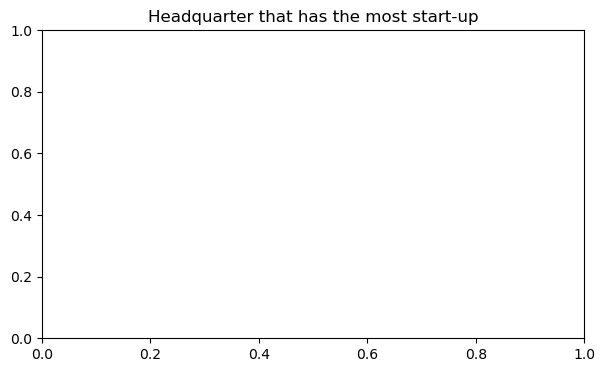

In [126]:
plt.figure(figsize=(7, 4))
plt.title('Headquarter that has the most start-up')
sns.barplot(x='Sector', y='HeadQuarter', data=india_startup_df)
plt.show()

In [ ]:
1. which Head quarter has the most start up located
2. top 10 headquarter that has the highest start up funding
3. top 10 sector recieve the most start up funding
4. which year has the most highest funding
5. What is the funding trend in the Indian start-up ecosystem over the past few years

Hypothesis 
Hypothesis:  What the company dose depends on the amount of funding secured
Null Hypothesis: What the company dose not have infulence  on the amount of funding secured 

  Hypothesis 
Hypothesis:  The amount of start up funding has infulence on the kind of investors 

Null Hypothesis: The amount of start up funding has no significance infulence on the investors 